In [1]:
import numpy as np
from osgeo import gdal, ogr,osr
import matplotlib.pyplot as plt
import glob,os,pathlib
import geopandas as gpd
from shapely.geometry import Polygon, mapping,LineString,Point

In [2]:
import clipping,masking,findindex

In [3]:
#Input_paths
L2path ="Landsat L2_test/Landsat C2 L2 Band Files"
path_to_shape = "Landsat L2_test/shp/test8.shp"
path_to_mask = "Landsat L2_test/contour/ndwi_mask/polygons_/20210207ndwicontour.shp"

#Output_Paths
index_out = "Landsat L2_test/index"
mask_out = "Landsat L2_test/masked"
clipped_path = "Landsat L2_test/Clipped"

In [8]:
List_img = glob.glob(L2path+'/*B*.tif')

In [9]:
List_img

['Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_SR_B1.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_SR_B2.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_SR_B3.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_SR_B4.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_SR_B5.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_SR_B6.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_SR_B7.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20210207_20210302_02_T1_ST_B10.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20220314_20220322_02_T1_SR_B1.TIF',
 'Landsat L2_test/Landsat C2 L2 Band Files\\LC08_L2SP_143052_20220314_20220322_02_T1_SR_B2.TIF',
 'Landsat L2_test/Landsat C2 

## Clip to the area of interest

In [10]:
for file in List_img:
    folderNm = pathlib.PurePath(file).name[:40]
    try:
        os.stat(clipped_path+'/'+folderNm)
    except:
        os.mkdir(clipped_path+'/'+folderNm)
    else:
        pass

    clipping.Clip_to_bound(file,clipped_path,path_to_shape)

saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B1.TIF
saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B2.TIF
saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B3.TIF
saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B4.TIF
saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B5.TIF
saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B6.TIF
saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B7.TIF
saved at : Landsat L2_test/Clipped/LC08_L2SP_143052_202

In [11]:
Img_folders = glob.glob(clipped_path+'/L*')
Img_folders

['Landsat L2_test/Clipped\\LC08_L2SP_143052_20210207_20210302_02_T1',
 'Landsat L2_test/Clipped\\LC08_L2SP_143052_20220314_20220322_02_T1']

## Get indices

In [12]:
for fl in Img_folders:
    
    folderNm = pathlib.PurePath(fl).name[:40]
    try:
        os.stat(index_out+'/'+folderNm)
    except:
        os.mkdir(index_out+'/'+folderNm)
    else:
        pass
    
    
    findindex.IndexCalculation(fl,index_out)

c:\Users\Ananthu\Documents\GitHub\Remote_Sensing_Indices\findindex.py:49: RuntimeWarning: invalid value encountered in true_divide
  wri = np.divide(B_3 + B_4, B_5+ B_7)


In [13]:
index_list = glob.glob(index_out+'/L*')
index_list

['Landsat L2_test/index\\LC08_L2SP_143052_20210207_20210302_02_T1',
 'Landsat L2_test/index\\LC08_L2SP_143052_20220314_20220322_02_T1']

In [14]:
folderNm=pathlib.PurePath(index_list[0]).name[17:40]

## Mask for water only

In [15]:
for file in index_list:
    folderNm = pathlib.PurePath(file).name[17:40]
    try:
        os.stat(mask_out+'/'+folderNm)
    except:
        os.mkdir(mask_out+'/'+folderNm)
    else:
        pass
    List_file = glob.glob(file+'/*.tif')
    List_file
    
    for f in List_file:
        fileNm = pathlib.PurePath(f).name
        #print(fileNm,'...................')
        clipping.Clip_to_bound1(f,mask_out+'/'+folderNm+'/Msk_'+fileNm,path_to_mask)
        print(mask_out+'/'+folderNm+'/Msk_'+fileNm)

Landsat L2_test/masked/20210207_20210302_02_T1/Msk_AWEILC08_L2SP_143052_20210207_20210302_02_T1.tif
Landsat L2_test/masked/20210207_20210302_02_T1/Msk_MNDWILC08_L2SP_143052_20210207_20210302_02_T1.tif
Landsat L2_test/masked/20210207_20210302_02_T1/Msk_NDMILC08_L2SP_143052_20210207_20210302_02_T1.tif
Landsat L2_test/masked/20210207_20210302_02_T1/Msk_NDVILC08_L2SP_143052_20210207_20210302_02_T1.tif
Landsat L2_test/masked/20210207_20210302_02_T1/Msk_NDWILC08_L2SP_143052_20210207_20210302_02_T1.tif
Landsat L2_test/masked/20210207_20210302_02_T1/Msk_WRILC08_L2SP_143052_20210207_20210302_02_T1.tif
Landsat L2_test/masked/20220314_20220322_02_T1/Msk_AWEILC08_L2SP_143052_20220314_20220322_02_T1.tif
Landsat L2_test/masked/20220314_20220322_02_T1/Msk_MNDWILC08_L2SP_143052_20220314_20220322_02_T1.tif
Landsat L2_test/masked/20220314_20220322_02_T1/Msk_NDMILC08_L2SP_143052_20220314_20220322_02_T1.tif
Landsat L2_test/masked/20220314_20220322_02_T1/Msk_NDVILC08_L2SP_143052_20220314_20220322_02_T1.tif

## Plotting

In [29]:
def sub_plots(raster_array,vmn,vmx,colr,Title,Ind):
    #vmn = -1
    #colr = 'seismic'
    #vmx = 1
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(Title, fontsize=16)
    ax = plt.subplot(121)
    ax.set_title(" 2021 Feb  ")
    plt.imshow(raster_array[Ind],vmin=vmn,vmax = vmx, cmap=colr)
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(122)
    ax.set_title("2022 march")
    plt.imshow(raster_array[Ind+6],vmin=vmn,vmax = vmx,cmap=colr)
    plt.colorbar(fraction=0.03)

In [35]:
def sub_plots1(raster_array,Title='2021 Feb'):
    #vmn = -1
    #colr = 'seismic'
    #vmx = 1
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(Title, fontsize=16)
    ax = plt.subplot(231)
    ax.set_title(" AWEI  ")
    plt.imshow(raster_array[0], cmap='YlGnBu')
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(232)
    ax.set_title("MNDWI")
    plt.imshow(raster_array[1],cmap='Wistia')
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(233)
    ax.set_title(" NDMI  ")
    plt.imshow(raster_array[2], cmap='PRGn')
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(234)
    ax.set_title("NDVI")
    plt.imshow(raster_array[3],cmap='YlGn')
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(235)
    ax.set_title(" NDWI  ")
    plt.imshow(raster_array[4], cmap='BuPu')
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(236)
    ax.set_title("AWI")
    plt.imshow(raster_array[5],cmap='GnBu')
    plt.colorbar(fraction=0.03)

In [18]:
List_file = glob.glob(mask_out+'/*'+'/*.tif')
List_file.sort() #order= awei=0,mndwi=1, ndmi=2, ndvi=3, ndwi=4, wri=5

In [19]:
indices = glob.glob(index_out+'/*'+'/*.tif')
indices.sort()  #order= awei=0,mndwi=1, ndmi=2, ndvi=3, ndwi=4, wri=5

In [20]:
def ToRasterArray(band):
    Rast_Band=[]
    for b in band:
        W_im = gdal.Open(b)
        Rast_Band.append(W_im.GetRasterBand(1).ReadAsArray().astype(np.float32))
    return Rast_Band

In [25]:
Images_water = ToRasterArray(List_file)

In [26]:
Images= ToRasterArray(indices)

In [27]:
#for Ind give order no:. order= awei=0,mndwi=1, ndmi=2, ndvi=3, ndwi=4, wri=5

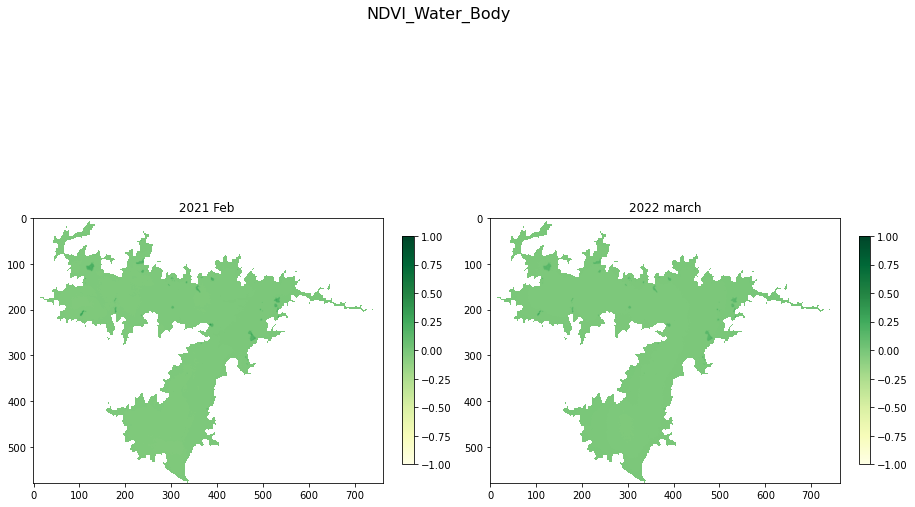

In [30]:
sub_plots(Images_water,vmn=-1,vmx=1,colr='YlGn',Title="NDVI_Water_Body",Ind=3)

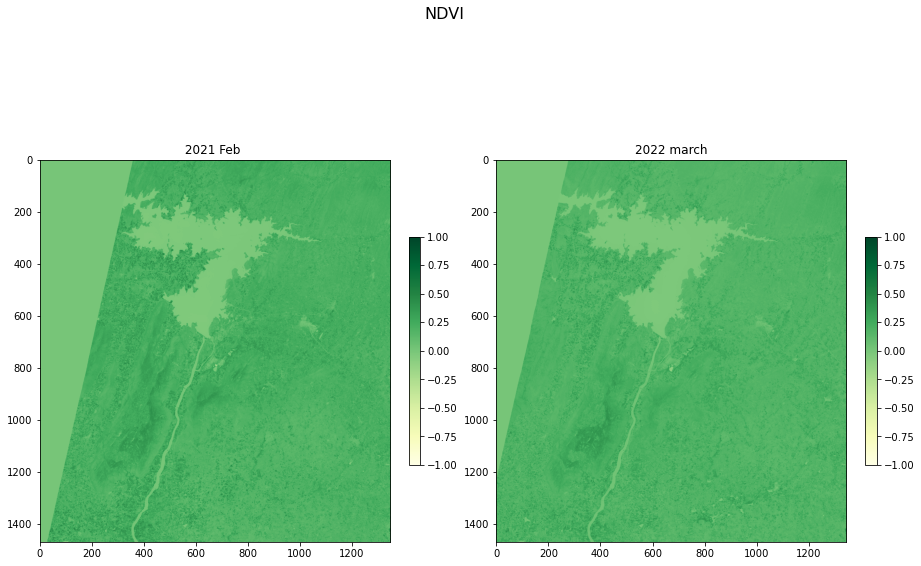

In [60]:
sub_plots(Images,vmn=-1,vmx=1,colr='YlGn',Title="NDVI",Ind=3)

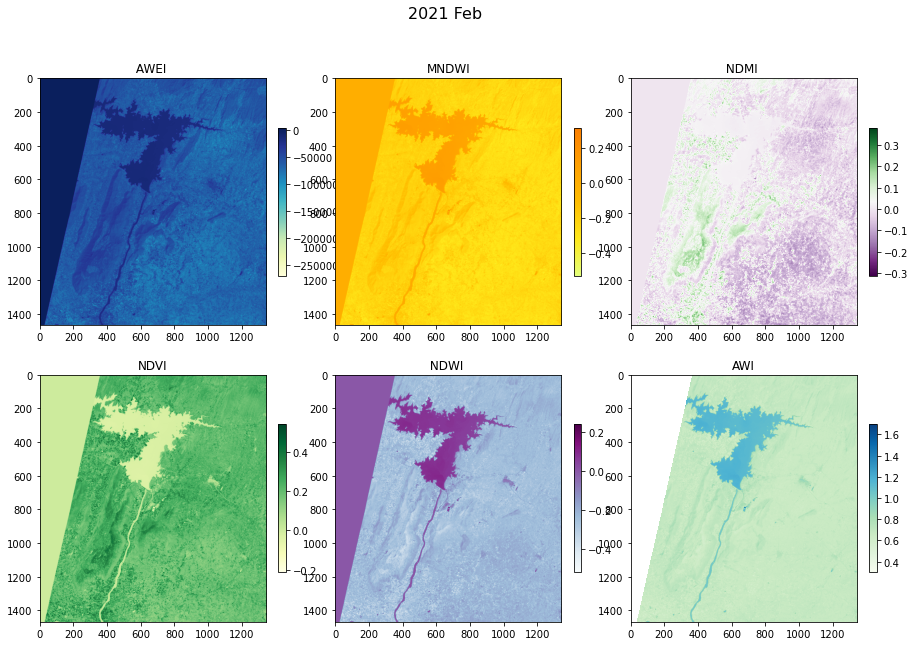

In [36]:
sub_plots1(Images)

### To create mask

In [1]:
import masking
#from shapely.geometry import Polygon, mapping,LineString,Point

In [28]:
contour_mask = "Landsat L2_test/contour/testMask"
image_formasking= "Landsat L2_test/index/LC08_L2SP_143052_20210207_20210302_02_T1/NDWILC08_L2SP_143052_20210207_20210302_02_T1.tif"

In [29]:
masking.get_contour(image_formasking,contour_mask)

Maximun dem elevation: 0.24, minimum dem elevation: -0.52


In [2]:
contour_shp = "Landsat L2_test/contour/testMask/Contour_NDWILC08_L2SP_143052_20210207_20210302_02_T1.shp"
mask_OutPath="Landsat L2_test/contour/testMask/Mask"

In [3]:
masking.Get_mask(contour_shp,mask_OutPath)

C:\Users\Ananthu\anaconda3\envs\GISTools\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
